<a href="https://colab.research.google.com/github/abdulloyev/DataScientis-openSource/blob/main/%238%20K-NN%20algoritmi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **K-NN algor** - ***Abdulloyev Ulug'bek***

# Kerakli kutubxonalarni chaqirib olamiz

In [107]:
import numpy as np
import pandas as pd

# Data ni o'qib olamiz

In [108]:
# dataning manzili
file_link = "https://drive.google.com/uc?export=download&id=19tVNQHHq5enAmtcJ6NTWJY26f8GLcrmu"

In [109]:
df = pd.read_csv(file_link)
df.sample(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,diagnosis
295,6,151,62,31,120,35.5,0.692,28,0
344,8,95,72,0,0,36.8,0.485,57,0
457,5,86,68,28,71,30.2,0.364,24,0


Korrelyasiya. Berilgan datasetda ‘diagnosis’ ustuniga tasir qiluvchi
ustunlarni topamiz.

In [110]:
corr_matrix = df.corr().abs()
corr_matrix.style.background_gradient(cmap="coolwarm")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,diagnosis
Pregnancies,1.000000,0.129459,0.141282,0.081672,0.073535,0.017683,0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,0.113970,0.074752
Insulin,0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,0.113970,0.042163,0.036242,0.033561,1.000000,0.238356
diagnosis,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


`x` va `y` qiymatlarini aniqlashtirib olamiz

In [111]:
X = df.drop("diagnosis", axis=1)
y = df['diagnosis']

In [112]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

Endi ma'lumotlarni taraing va test qismlariga ajratib chiqmiz

In [113]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# K-NN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier() # k-ni qiymati default qiymati bizda 5 ga teng bo'ladi
knn.fit(X_train, y_train)

KNeighborsClassifier()

Sinov natijasini bashorat qilish: Test to‘plami natijasini bashorat qilish
uchun y_predict vektorini yaratamiz. Quyida uning kodi:


In [114]:
y_predict = knn.predict(X_test)

Confusion matritsasini yaratish:

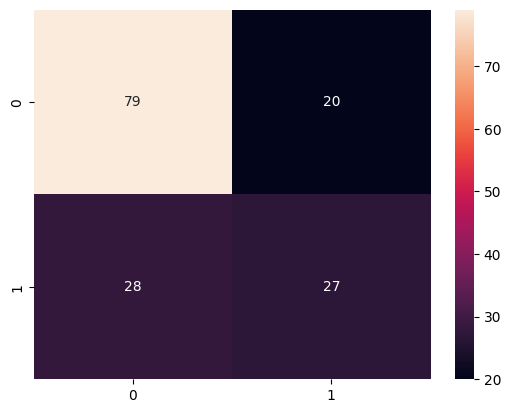

In [115]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()

Bashorat natijasi olingandan so‘ng, uni Accuracy, Precision Recall, F-1
Score yordamida baholaymiz.

In [116]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)

print(f"{precision}\n{recall}\n{f1}\n{accuracy}")

0.574468085106383
0.4909090909090909
0.5294117647058824
0.6883116883116883


For operatori yordamida: for operatori yordamida K ni qiymatlarini 1 dan 25
gacha oraliqda natijasini solishtirb chiqamiz

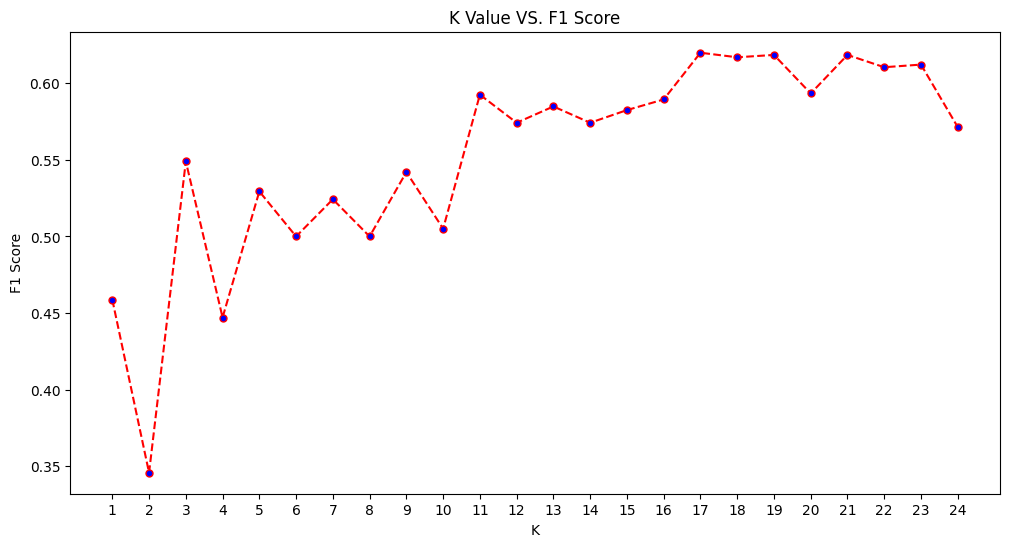

In [117]:
f1 = []
for k in range(1, 25):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_predict = knn.predict(X_test)
    f1.append(f1_score(y_test, y_predict))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 25), f1, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=5)
plt.xticks(range(1, 25))
plt.title('K Value VS. F1 Score')
plt.xlabel('K')
plt.ylabel('F1 Score')
plt.show()

K ning eng yaxshi qiymatini topish uchun `sklearn` kutubxonasi tarkibida
tayyor `GridSearchCV` funksiyasi mavjud, quyida uning kodi:

In [118]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1, 25)}

knn_gscv = GridSearchCV(knn, param_grid, cv=5)

knn_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=24),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

Natijadan ko‘rinib turibdiki funksiya `K` ning eng yaxshi qiymati **17** ekanligini
ko‘rsatmoqda.

In [119]:
knn_gscv.best_params_

{'n_neighbors': 17}

**Best_score_** funksiyasi orqali esa `K` ning eng yaxshi qiymatida aniqlikni
aniqlaymiz.

In [120]:
knn_gscv.best_score_

0.7669892199303965

Natijadan ko‘rinib turibdiki funksiya `K=17` bo‘lganda aniqlik **76%** ni tashkil etar
ekan. Biz bu natijani xatolik grafigi orqali tasvirlab ham ko‘rishimiz mumkin.

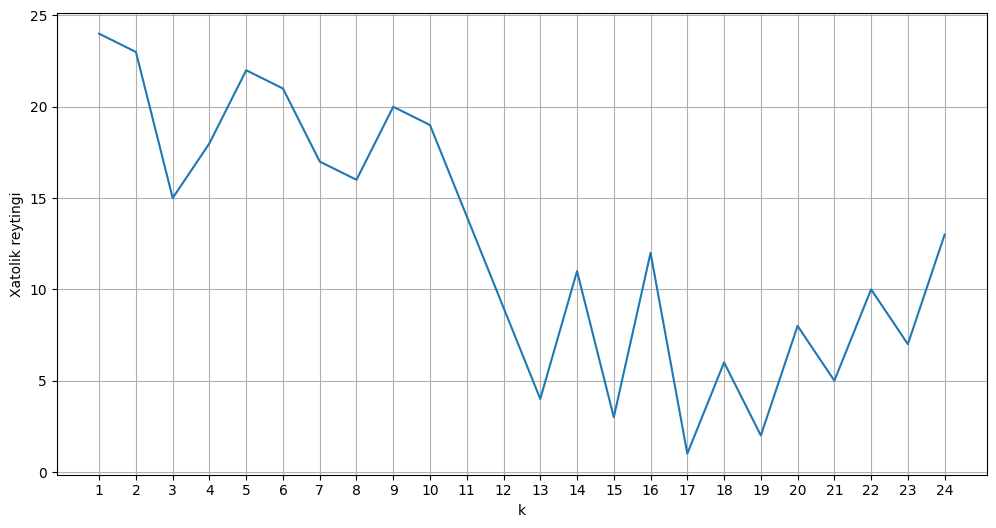

In [121]:
plt.figure(figsize=(12, 6))
plt.plot(param_grid['n_neighbors'], knn_gscv.cv_results_['rank_test_score'])
plt.xticks(param_grid['n_neighbors'])
plt.xlabel('k')
plt.ylabel('Xatolik reytingi')
plt.grid()
plt.show()

Yuqoridagi grafikda modelning xatolik darajasi ko‘rsatib o‘tilgan, K ning qiymati
**17** ga teng bo‘lganda eng kam xatolikga erishilmoqda.